<a href="https://colab.research.google.com/github/Angus-Eastell/Intro_to_AI/blob/main/2_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

For the first few questions, we're going to work with the following dataset,

Text(0, 0.5, 'y')

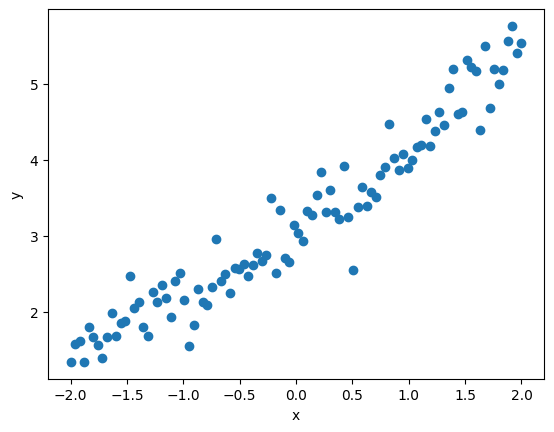

In [44]:
import torch as t
import matplotlib.pyplot as plt
t.manual_seed(1) #Fix the random seed, so we always generate the same data.

N = 100
x = t.linspace(-2, 2, N)
y = 3. + x + 0.2*x**2 + 0.3*t.randn(N)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

## 1) Fitting a straight line
#### 1.1) Constructing the feature matrix

We start with the simplest thing: fitting a straight line of the form:
\begin{align}
  \hat{y}(x) = w_1 + w_2 x
\end{align}
The first step is always to compute the feature matrix.  In this case, we have a "constant" feature, corresponding to $w_1$, and a linear feature corresponding to $w_2$,
\begin{align}
  \mathbf{X} = \begin{pmatrix}
    1 & x_1 \\
    1 & x_2 \\
    \vdots & \vdots \\
    1 & x_N
  \end{pmatrix}
\end{align}
Hint: to construct this matrix, look at the documentation for [torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html).   Once you've constructed something, check that the resulting tensor has the right shape (i.e. $N \times 2$).

In [52]:
#Your code here

X = t.ones(N, 2)
X[:,1] = x


In [48]:
# @title Answer
ones = t.ones(N)
X = t.stack([ones, x], -1) #-1 here is an easy way of indicating that I want to concatenate along the _last_ dimension.
print(X.shape)

torch.Size([100, 2])


#### 1.2) Find the best weights

Next, find the best weights using the analytic formula,
\begin{align}
  \mathbf{w^*} &= (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T\mathbf{y}.
\end{align}
Think carefully about how to order the matrix products most efficiently.  Print the weights and check they are reasonable (you can see how the data was generated right at the top, so we know the first weight should be about 3, and the second weight should be about 1).

Hint: look in the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) for how to compute a matrix inverse.

[Why am I being awkward and not just telling you the function?  Because I can't tell you everything in this course.  In practice, there's always going to be stuff you don't know.  And if you're doing something interesting enough, you won't be able to ask anyone about it either.  So you _need_ to know how to find stuff out for yourself.]


In [53]:
#Your code here

w = (t.linalg.inv(X.mT @ X)) @ (X.mT @ y)

In [ ]:
# @title Answer
w = t.linalg.inv(X.mT@X)@(X.mT@y)
w

tensor([3.2112, 0.9917])

#### 1.3) Plot predictions using the formula

Now, plot the predictions in two different ways.  Start by using the explicit formula:
\begin{align}
  \hat{y}(x) = w_1 + w_2 x
\end{align}
Hint: in maths, we tend to index from $1...D$.  Whereas in Python we index from $0...D-1$.

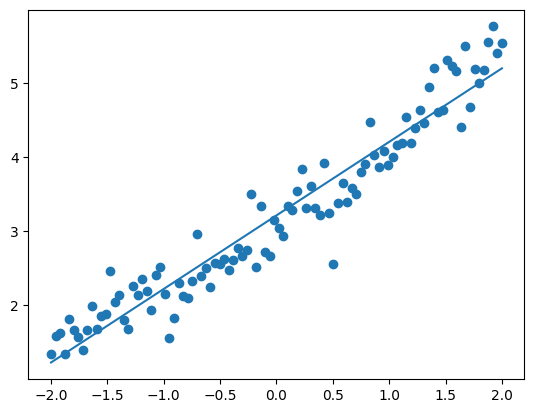

In [55]:
#Your code here

y_pred = w[0] + w[1] * x

plt.scatter(x, y)
plt.plot(x, y_pred)


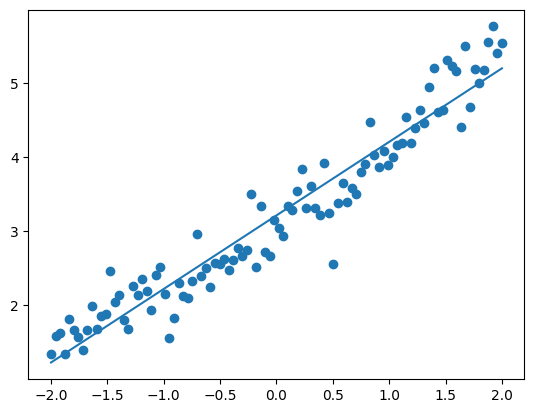

In [ ]:
# @title Answer
yh = w[0] + w[1] * x
plt.plot(x, yh)   #Plot the prediction as a line
plt.scatter(x, y) #Plot the data as points

#### 1.4) Plot predictions using matrix-vector multiplication

Next, use the matrix-vector form,
\begin{align}
  \mathbf{\hat{y}} = \mathbf{w X}
\end{align}

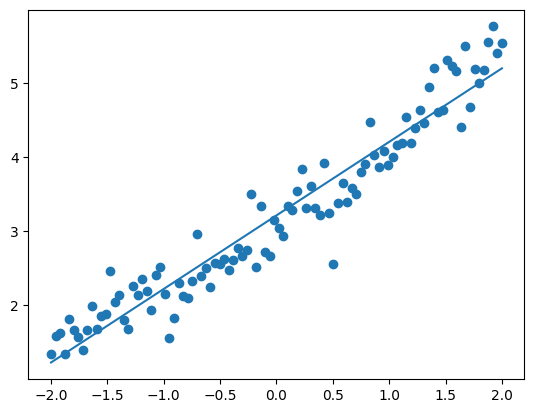

In [56]:
#Your code here
y_pred = X @ w

plt.scatter(x, y)
plt.plot(x, y_pred)


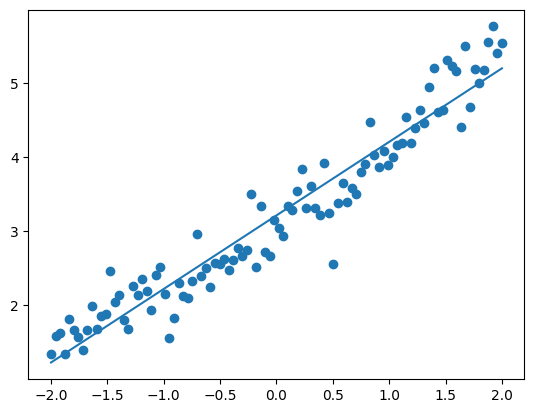

In [ ]:
# @title Answer

yh = X@w
plt.plot(x, yh)   #Plot the prediction as a line
plt.scatter(x, y) #Plot the data as points

## 2) Fitting a quadratic function

Now, obtain the optimal weights and plot the predictions, for a nonlinear predictor
\begin{align}
  \hat{y}(x) = w_1 + w_2 x + w_3 x^2
\end{align}
Again, use the analytic formula for the optimal weights, and use either method above to plot the predictions.

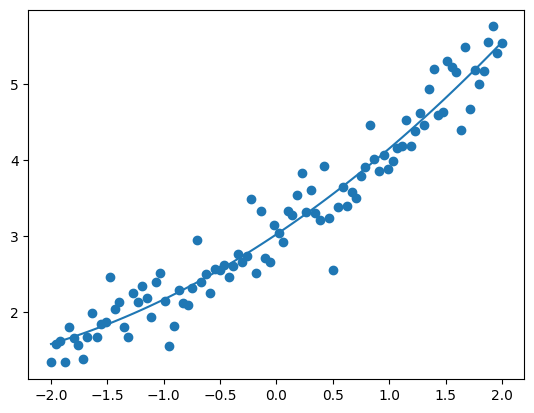

In [58]:
#Your code here

X = t.ones(N,3)
X[:,1] = x
X[:,2] = x**2

w = t.linalg.inv(X.mT@X)@(X.mT@y)
y_pred = X @ w

plt.scatter(x, y)
plt.plot(x, y_pred)

tensor([3.0270, 0.9917, 0.1355])

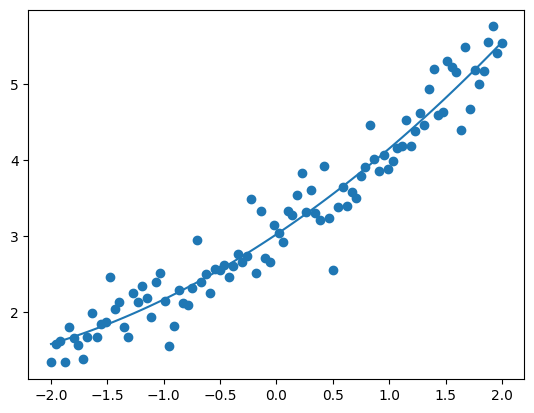

In [ ]:
# @title Answer

ones = t.ones(N)
X = t.stack([ones, x, x*x], -1)
w = t.linalg.inv(X.mT@X)@(X.mT@y)
yh = X@w
plt.plot(x, yh)   #Plot the prediction as a line
plt.scatter(x, y) #Plot the data as points
w

## 3) Compute the optimal weights using gradient descent

#### 3.1) Compute the loss
Write a function that takes a value for the weights as input, and returns the squared error loss,
\begin{align}
  \mathcal{L} = \sum_{i=1}^N (y_i - \hat{y}_i)^2
\end{align}
where,
\begin{align}
  \mathbf{\hat{y}} = \mathbf{X w}
\end{align}

In [60]:
#Your code here

loss = ((y -y_pred)**2).sum()
print(loss)


tensor(7.9032)


In [ ]:
# @title Answer

def loss(w):
    yh = X@w
    return ((y-yh)**2).sum()

#### 3.2) Compute the gradients

Write a function that takes a value for the weights as input, and returns the gradient at that location.
Use,
\begin{align}
  \frac{\partial \mathcal{L}}{\partial \mathbf{w}} = -2 \mathbf{X}^T (\mathbf{y} - \mathbf{\hat{y}})
\end{align}
where,
\begin{align}
  \mathbf{\hat{y}} = \mathbf{X w}
\end{align}

In [61]:
#Your code here

grad = -2 * X.mT @ (y - y_pred)



In [ ]:
# @title Answer

def grad(w):
    yh = X@w
    return -2 * X.mT@(y - yh)

#### 3.3) Use gradient descent to find the optimal weights,

Use,
\begin{align}
  \mathbf{w}_{t+1} = \mathbf{w}_t - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{w}}
\end{align}
where $\eta$ is a learning rate.  Use $\eta=0.001$.  Initialize the weights at zero.

Print the value of the loss at each step, to confirm it is going down.

Check that the resulting weights are close to those you get using the analytic formula.

Why doesn't the loss go to zero?

In [67]:
#Your code here

w_t = t.zeros(3)
n = 0.001
for i in range(100):
  # find prediction
  y_pred = X @ w_t
  # find loss
  loss = ((y -y_pred)**2).sum()
  print(loss)
  # find gradient
  grad = -2 * X.mT @ (y - y_pred)
  # find new w_t
  w_t = w_t - (n * grad)

print(w_t)




tensor(1175.6075)
tensor(344.2755)
tensor(245.7088)
tensor(198.0325)
tensor(164.1067)
tensor(138.1674)
tensor(117.5831)
tensor(100.8204)
tensor(86.9260)
tensor(75.2733)
tensor(65.4264)
tensor(57.0654)
tensor(49.9443)
tensor(43.8678)
tensor(38.6766)
tensor(34.2384)
tensor(30.4422)
tensor(27.1943)
tensor(24.4149)
tensor(22.0363)
tensor(20.0005)
tensor(18.2580)
tensor(16.7666)
tensor(15.4900)
tensor(14.3973)
tensor(13.4619)
tensor(12.6613)
tensor(11.9760)
tensor(11.3894)
tensor(10.8873)
tensor(10.4575)
tensor(10.0896)
tensor(9.7747)
tensor(9.5052)
tensor(9.2745)
tensor(9.0770)
tensor(8.9079)
tensor(8.7632)
tensor(8.6394)
tensor(8.5333)
tensor(8.4426)
tensor(8.3649)
tensor(8.2984)
tensor(8.2415)
tensor(8.1928)
tensor(8.1511)
tensor(8.1154)
tensor(8.0848)
tensor(8.0587)
tensor(8.0363)
tensor(8.0171)
tensor(8.0007)
tensor(7.9867)
tensor(7.9747)
tensor(7.9644)
tensor(7.9556)
tensor(7.9480)
tensor(7.9416)
tensor(7.9360)
tensor(7.9313)
tensor(7.9273)
tensor(7.9238)
tensor(7.9208)
tensor(7.9183)

In [ ]:
# @title Answer

w_gd = t.zeros(3)
eta = 0.001
for _ in range(100):
    w_gd = w_gd - eta * grad(w_gd)
    print(loss(w_gd))
w_gd

#The loss doesn't go to zero because there's noise, so the linear predictions can never be perfect.

tensor(344.2755)
tensor(245.7088)
tensor(198.0325)
tensor(164.1067)
tensor(138.1674)
tensor(117.5831)
tensor(100.8204)
tensor(86.9260)
tensor(75.2733)
tensor(65.4264)
tensor(57.0654)
tensor(49.9443)
tensor(43.8678)
tensor(38.6766)
tensor(34.2384)
tensor(30.4422)
tensor(27.1943)
tensor(24.4149)
tensor(22.0363)
tensor(20.0005)
tensor(18.2580)
tensor(16.7666)
tensor(15.4900)
tensor(14.3973)
tensor(13.4619)
tensor(12.6613)
tensor(11.9760)
tensor(11.3894)
tensor(10.8873)
tensor(10.4575)
tensor(10.0896)
tensor(9.7747)
tensor(9.5052)
tensor(9.2745)
tensor(9.0770)
tensor(8.9079)
tensor(8.7632)
tensor(8.6394)
tensor(8.5333)
tensor(8.4426)
tensor(8.3649)
tensor(8.2984)
tensor(8.2415)
tensor(8.1928)
tensor(8.1511)
tensor(8.1154)
tensor(8.0848)
tensor(8.0587)
tensor(8.0363)
tensor(8.0171)
tensor(8.0007)
tensor(7.9867)
tensor(7.9747)
tensor(7.9644)
tensor(7.9556)
tensor(7.9480)
tensor(7.9416)
tensor(7.9360)
tensor(7.9313)
tensor(7.9273)
tensor(7.9238)
tensor(7.9208)
tensor(7.9183)
tensor(7.9161)
te

tensor([3.0260, 0.9917, 0.1359])